In [14]:
import pandas as pd
import numpy as np
from statistics import mean
from scipy import stats
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import cv2
from PIL import Image


In [2]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**

Предположим, что вам нужно провести эксперимент. Вам заведомо известно, сколько людей в России оплачивают покупки картой. Но на будущее вы хотите понять, какой объём выборки оптимально использовать, чтобы не проводить полномасштабный опрос граждан, а опросить какое-то ограниченное количество людей и получить достаточно точную оценку этой же величины.

Известно, что 65% пользуются картой для оплаты покупок в магазинах. Население страны — 146 млн чел.

1.   Создайте генеральную совокупность этих людей: 1 — если человек оплачивает картой; 0 — если оплачивает только наличными.
2.   Сделайте 10 раз выборку из этой генеральной совокупности по 100 человек. Посчитайте долю оплачивающих картой в каждой выборке. Посчитайте среднюю этих долей. Сравните с реальным значением по генеральной совокупности — 65%.
3.   Проделайте аналогичные вычисления, но для 1 000 человек в выборке.
4.   Проделайте аналогичные вычисления, но для 10 000 человек в выборке.
5.   Напишите функцию, которая на вход будет принимать объём выборки и количество раз, которое нужно этот объём выборки получить, а на выход она будет печатать долю оплачивающих картой по каждой выборке и среднее значение доли по выборке.
6.   Посчитайте 95% доверительные интервалы, взяв по одной выборке размера 100, 1 000 и 10 000 человек. Округлите границы интервала до 5 знаков после запятой. Оформите это в еще одну функцию.
7.   Посчитайте 80% доверительные интервалы, взяв выборки того же размера.







In [3]:
# пункт 1
gen_1 = np.zeros(51100000) 
gen_0 = np.ones(94900000) 
population = np.concatenate((gen_0,gen_1))
np.random.shuffle(population)
population

array([0., 1., 1., ..., 1., 1., 1.])

In [4]:
# пункт 2
def sample(x,y):
  z = []
  i = 1
  for i in range(y):
    x_s = np.random.choice(population,size=x, replace=False, p=None)
    x_d = x_s.mean()
    z.append(x_d)
    i = i+1
  return print(z, "Средняя доля в ", y, " выборках по ", x, " составляет: ", round(mean(z)*100,1), " %")  

In [5]:
x = 100
y = 10
sample(x,y)

[0.59, 0.67, 0.62, 0.63, 0.71, 0.6, 0.67, 0.64, 0.72, 0.55] Средняя доля в  10  выборках по  100  составляет:  64.0  %


In [6]:
# пункт 3
x = 1000
y = 10
sample(x,y)

[0.623, 0.675, 0.65, 0.638, 0.653, 0.651, 0.659, 0.661, 0.653, 0.656] Средняя доля в  10  выборках по  1000  составляет:  65.2  %


In [8]:
# пункт 4
x = 10000
y = 10
sample(x,y)

[0.6525, 0.6524, 0.6594, 0.6599, 0.6492, 0.6553, 0.6562, 0.6503, 0.6545, 0.6535] Средняя доля в  10  выборках по  10000  составляет:  65.4  %


In [ ]:
# пункт 5
from numpy import sqrt
def interval(x_i, alpha):
  population_1 = np.random.choice(population,size=x_i, replace=False, p=None)
  mean, sigma = np.mean(population), np.std(population)
  int = stats.norm.interval(alpha, loc=mean, scale=sigma/sqrt(x_i))
  return print("Доверительный интервал в ", alpha*100, " % на выборке из ", x_i, " = ", np.around (int,5))

In [ ]:
# пункт 6
x_i = 100
alpha = 0.95
interval(x_i, alpha)

Доверительный интервал в  95.0  % на выборке из  100  =  [0.55652 0.74348]


In [ ]:
x_i = 1000
alpha = 0.95
interval(x_i, alpha)

Доверительный интервал в  95.0  % на выборке из  1000  =  [0.62044 0.67956]


In [ ]:
x_i = 10000
alpha = 0.95
interval(x_i, alpha)

Доверительный интервал в  95.0  % на выборке из  10000  =  [0.64065 0.65935]


In [ ]:
# пункт 7
x_i = 100
alpha = 0.80
interval(x_i, alpha)


Доверительный интервал в  80.0  % на выборке из  100  =  [0.58887 0.71113]


In [ ]:
x_i = 1000
alpha = 0.80
interval(x_i, alpha)

Доверительный интервал в  80.0  % на выборке из  1000  =  [0.63067 0.66933]


In [ ]:
x_i = 10000
alpha = 0.80
interval(x_i, alpha)

Доверительный интервал в  80.0  % на выборке из  10000  =  [0.64389 0.65611]


**Task 2**

Известно, что в конкурирующем банке у клиентов средний остаток на текущем счете равен 30 000 руб., а среднее квадратическое отклонение — 12 000 руб. У какого процента клиентов можно ожидать, что остатки на текущем счете будут более 50 000 руб.? Округлите процент до двух знаков после запятой.

In [ ]:
y = stats.norm.cdf(x=50000, loc=30000, scale=12000)
y_new = round((1-y)*100,2)
y_new

4.78

**Task 3**

Вероятность того, что клиент воспользуется промокодом на скидку равна 0.5. Какова вероятность того, что среди 100 клиентов, совершивших покупку, будет 50 клиентов, которые воспользовались промокодом, и 50 клиентов, которые не воспользовались промокодом? Округлите вероятность до 5 знаков после запятой.



In [ ]:
n = 100
p = 0.5
k = 50
p_nk = round((math.factorial(n)/(math.factorial(k)*math.factorial(k)))*(p**n),5) #по формуле Бернулли
p_nk

0.07959

**Task 4**

Вам нужно получить прогноз остатков на счёте каждого клиента через месяц. Для этого вы воспользуетесь линейной регрессией. В качестве признаков у вас всего два показателя. У вас уже посчитана матрица весов W: 49.9322, 100.8343, у вас есть матрица признаков X и есть вектор смещения b: 12359. Вам нужно получить y, используя только матричные операции.

In [7]:
x = np.array([[32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754],[31.70700585, 68.77759598, 62.5623823, 71.54663223, 87.23092513, 78.21151827, 79.64197305, 59.17148932, 75.3312423, 71.30087989, 55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]])
b = 12359
w0 = 49.9322
w1 = 100.8343
y = w0 * x[0] + w1 * x[1] + b # х содержит 2 вектора, поэтому используем индексы
y = np.array(y)
y

array([17179.06734447, 21961.85861051, 21739.78016878, 21943.9177114 ,
       24141.47433184, 22998.77447682, 22996.6924778 , 20287.82952942,
       22356.96364812, 22172.51214411, 20189.49948874, 23389.59348101,
       20816.83452211, 22865.66702848, 23403.07572941, 20926.49716477,
       22948.73760846, 25189.01191769, 19562.30775647, 20032.38307474])

**Task 5**

Посчитайте матрицу ковариаций признаков X из предыдущего упражнения. Из матрицы ковариаций посчитайте матрицу корреляций. Напишите свой класс, в котором будет две функции: расчет матрицы ковариаций и расчет матрицы корреляций. Используйте для этого только матричные операции. Использовать напрямую методы библиотек — запрещено.

In [11]:
class matrices:
    def matrix_cov(x):
        cov_x = [[],[]] # создаем пустую матрицу
        x_x0 = x[0] - x[0].mean() # вычитаем среднее х из всего 1 вектора (на выходе массив)
        x_x1 = x[1] - x[1].mean() # вычитаем среднее х из всего 2 вектора (на выходе массив)
        cov_x[0] = np.append(cov_x[0] ,np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1)) # ковариация 1 вектора от 1 вектора
        cov_x[0] = np.append(cov_x[0] ,np.sum(x_x0*x_x1)/(len(x_x0*x_x1)-1)) # ковариация 1 вектора от 2 вектора
        cov_x[1] = np.append(cov_x[1] ,np.sum(x_x1*x_x0)/(len(x_x1*x_x0)-1)) # ковариация 2 вектора от 1 вектора
        cov_x[1] = np.append(cov_x[1] ,np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1)) # ковариация 2 вектора от 2 вектора
        return cov_x # возвращаем матрицу ковариаций
        
    def matrix_cor(x):
        corr_x = [[],[]] 
        x_x0 = x[0] - x[0].mean()
        x_x1 = x[1] - x[1].mean()
        corr_x[0] = np.append(corr_x[0] ,cov_x[0][0]/math.sqrt((np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1))*(np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1))))
        corr_x[0] = np.append(corr_x[0] ,cov_x[0][1]/math.sqrt((np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1))*(np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1))))
        corr_x[1] = np.append(corr_x[1] ,cov_x[1][0]/math.sqrt((np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1))*(np.sum(x_x0*x_x0)/(len(x_x0*x_x0)-1)))) 
        corr_x[1] = np.append(corr_x[1] ,cov_x[1][1]/math.sqrt((np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1))*(np.sum(x_x1*x_x1)/(len(x_x1*x_x1)-1))))
        return corr_x # возвращаем матрицу корреляций

In [12]:
x = np.array([[32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754],[31.70700585, 68.77759598, 62.5623823, 71.54663223, 87.23092513, 78.21151827, 79.64197305, 59.17148932, 75.3312423, 71.30087989, 55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]])
cov_x = matrices.matrix_cov(x)
print("Матрица ковариации: \n", np.array(cov_x),"\n")
corr_x = matrices.matrix_cor(x) 
print("Матрица корреляции: \n", np.array(corr_x))

Матрица ковариации: 
 [[ 61.84185688  87.89094375]
 [ 87.89094375 228.6795499 ]] 

Матрица корреляции: 
 [[1.         0.73907618]
 [0.73907618 1.        ]]


**Task 6**

Используя несколько кернелов из области Computer Vision, модифицируйте изображение через операцию свёртки. Кернелы представлены ниже:

In [ ]:
kernel1 = np.array([[1/19, 1/19, 1/19], [1/19, 1/19, 1/19], [1/19, 1/19, 1/19]])
kernel2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel3 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel4 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel5 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel6 = np.array([[1, 1, 1], [1, -20, 1], [1, 1, 1]])

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#загрузка картинки
img_src = cv2.imread('/content/drive/MyDrive/Школа 21/DS_project09-0/s21_color.png', cv2.IMREAD_GRAYSCALE) # # считываем картинку, переведя в grayscale

Исходное изображение:



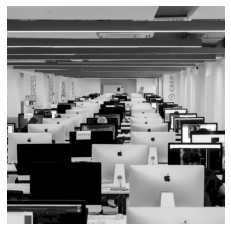

Изображение после наложения первого кернела:



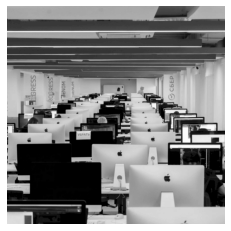

Изображение после наложения второго кернела:



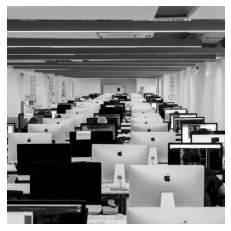

Изображение после наложения третьего кернела:



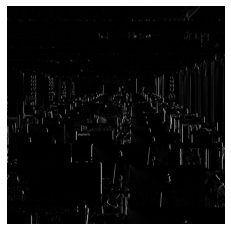

Изображение после наложения четвертого кернела:



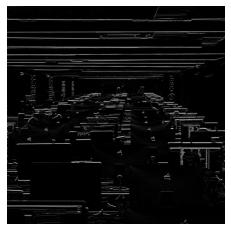

Изображение после наложения пятого кернела:



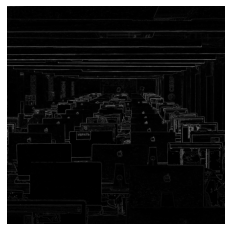

Изображение после наложения шестого кернела:



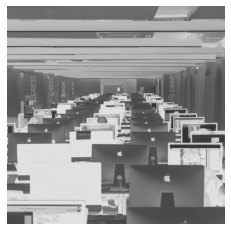

In [21]:
from cv2 import cvtColor

#img = cv2.imread('s21_color.png') # считываем картинку в img
#img_src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # переводим картинку в grayscale
print ("Исходное изображение:\n")
plt.imshow(img_src, cmap='gray') # устанавливаем карту цветов для отображения картинки в matplotlib
plt.axis('off') # отключаем отображение осей
plt.show() # отображаем картинку
cv2.imwrite('/content/drive/MyDrive/Школа 21/DS_project09-0/invert_gray.png', img_src) # сохраняем картинку

kernel1 = np.array([[1/19, 1/19, 1/19], [1/19, 1/19, 1/19], [1/19, 1/19, 1/19]])
kernel2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel3 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel4 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel5 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel6 = np.array([[1, 1, 1], [1, -20, 1], [1, 1, 1]])

img_rst1 = cv2.filter2D(img_src,-1,kernel1) # накладываем на картинку 1 kernel
print ("Изображение после наложения первого кернела:\n")
plt.imshow(img_rst1, cmap='gray') 
plt.axis('off') 
plt.show() 

img_rst2 = cv2.filter2D(img_src,-1,kernel2) # накладываем на картинку 2 kernel
print ("Изображение после наложения второго кернела:\n")
plt.imshow(img_rst2, cmap='gray') 
plt.axis('off') 
plt.show() 

img_rst3 = cv2.filter2D(img_src,-1,kernel3) # накладываем на картинку 3 kernel
print ("Изображение после наложения третьего кернела:\n")
plt.imshow(img_rst3, cmap='gray') 
plt.axis('off') 
plt.show()

img_rst4 = cv2.filter2D(img_src,-1,kernel4) # накладываем на картинку 4 kernel
print ("Изображение после наложения четвертого кернела:\n")
plt.imshow(img_rst4, cmap='gray') 
plt.axis('off') 
plt.show() 

img_rst5 = cv2.filter2D(img_src,-1,kernel5) # накладываем на картинку 5 kernel
print ("Изображение после наложения пятого кернела:\n")
plt.imshow(img_rst5, cmap='gray') 
plt.axis('off') 
plt.show() 

# После наложения 6 кернела картинка должна инвертировать цвета, 
# для этого необходимо нормировать массив , разделив его на 255
img_rst6 = cv2.filter2D(img_src/255,-1,kernel6) # накладываем на картинку 6 kernel
print ("Изображение после наложения шестого кернела:\n")
plt.imshow(img_rst6, cmap='gray') 
plt.axis('off') 
plt.show() 

**Task 7**

Используя алгоритм SVD, сократите размерность матрицы, описывающей изображение в черно-белом канале из предыдущего упражнения. В исходном виде изображение описывается матрицей 1707 на 1707. Попробуйте взять первый сингулярный вектор из разложения SVD, первые два, первые 5, первые 10, первые 50, первые 100.

In [23]:
#загрузка картинки
gray_image = cv2.imread('/content/drive/MyDrive/Школа 21/DS_project09-0/s21_color.png', cv2.IMREAD_GRAYSCALE) # считываем картинку, переведя в grayscale

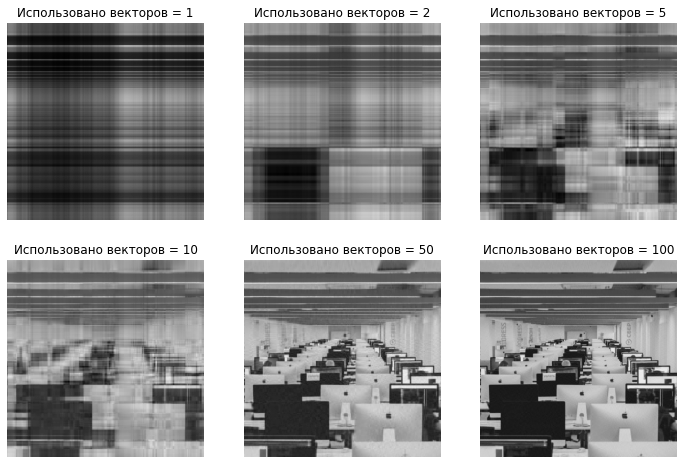

In [24]:
u, s, v = np.linalg.svd(gray_image, full_matrices=False) # разложение по сингулярным значениям
 
comps = [1, 2, 5, 10, 50, 100] # задаем кол-во векторов для отображения
plt.figure(figsize=(12, 8)) # задаем размер отображаемых картинок
 
for i in range(len(comps)): # создаем цикл для создания картинок с нужным кол-вом векторов
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :] # собираем картинку из сингулярных значений с нужным кол-вом векторов
    plt.subplot(2, 3, i+1) # задаем ориентацию для картинок
    plt.imshow(low_rank, cmap='gray') # устанавливаем карту цветов для отображения картинки в matplotlib
    plt.title(f'Использовано векторов = {comps[i]}') # выводим подпись к картинке
    plt.axis('off') # отключаем отображение осей